In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [2]:
np.random.seed(0) 

In [3]:
dogs_whisker_length = np.random.normal(loc=5,scale=1,size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8,scale = 1,size = 10)

In [4]:
cats_whisker_length = np.random.normal(loc=8,scale=1,size=10)
cats_ear_flappiness_length = np.random.normal(loc=5,scale=1,size=10)

In [5]:
#combine the data
dogs_data = np.vstack((dogs_whisker_length,dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length,cats_ear_flappiness_length)).T
data = np.vstack((dogs_data,cats_data))
labels = np.hstack((np.zeros(len(dogs_data)),np.ones(len(cats_data))))

In [6]:
dogs_data

array([[6.76405235, 8.14404357],
       [5.40015721, 9.45427351],
       [5.97873798, 8.76103773],
       [7.2408932 , 8.12167502],
       [6.86755799, 8.44386323],
       [4.02272212, 8.33367433],
       [5.95008842, 9.49407907],
       [4.84864279, 7.79484174],
       [4.89678115, 8.3130677 ],
       [5.4105985 , 7.14590426]])

In [7]:
cats_data

array([[ 5.44701018,  5.15494743],
       [ 8.6536186 ,  5.37816252],
       [ 8.8644362 ,  4.11221425],
       [ 7.25783498,  3.01920353],
       [10.26975462,  4.65208785],
       [ 6.54563433,  5.15634897],
       [ 8.04575852,  6.23029068],
       [ 7.81281615,  6.20237985],
       [ 9.53277921,  4.61267318],
       [ 9.46935877,  4.69769725]])

In [8]:
#split data into tetsting and training sets
#spliting training and testing part into testing of 20 percent and training of 80 percent
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

In [9]:
print(f"x_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_test shape: (4, 2)
y_test shape: (4,)


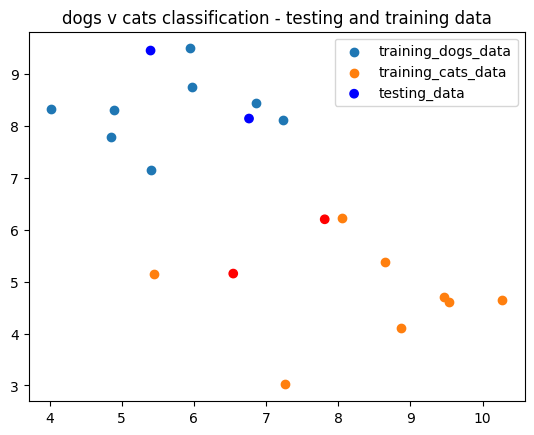

In [10]:
plt.scatter(X_train[y_train==0][:,0],X_train[y_train==0][:,1],label='training_dogs_data')
plt.scatter(X_train[y_train==1][:,0],X_train[y_train==1][:,1],label='training_cats_data')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='bwr',label='testing_data')
plt.xlabel=('whisker_length')
plt.ylabel=('ear_flappiness_index')
plt.title('dogs v cats classification - testing and training data')
plt.legend()
plt.show()



In [11]:
def random_linear_classifier(data_dogs,data_cats,k,d):
    best_error = float('inf')
    best_theta = None
    best_theta0 = None
#here we are taking the range and for each iteration a random theta and a random theta0 is selected 
    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

#here we find error between our pridiction and the actual data from compute_error function
        error = compute_error(data_dogs,data_cats,theta,theta0)

        if error <best_error:
            best_error= error
            best_theta=theta
            best_theta0=theta0
#add best_error here 
    return best_theta,best_theta0,best_error

def compute_error(data_dogs,data_cats,theta,theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta,x_dog) + theta0 <= 0:
            error +=1
    for x_cat in data_cats:
        if np.dot(theta,x_cat) + theta0 > 0:
            error +=1
    return error


In [12]:
#define function for k-fold cross-velidation 
def cross_validate(data_dogs,data_cats,k_values,d,n_splits = 5):
    kf = KFold(n_splits=n_splits,shuffle=True,random_state=True)
    avg_errors = []

    for k in k_values:
        errors = [] 

        for train_index , val_index in kf.split(data_dogs):
            X_train_fold = np.vstack((data_dogs[train_index],data_cats[train_index]))
            y_train_fold = np.hstack((np.zeros(len(train_index)),np.ones(len(train_index))))
            X_val_fold = np.vstack((data_dogs[val_index],data_cats[val_index]))
            y_val_fold = np.hstack((np.zeros(len(val_index)),np.ones(len(val_index))))
            
            best_theta_fold, best_theta0_fold , error = random_linear_classifier(X_train_fold[y_train_fold==0]
                                                                                 ,X_train_fold[y_train_fold==1],k,d)
            errors.append(compute_error(X_val_fold[y_val_fold==0],X_val_fold[y_val_fold==1],best_theta_fold,best_theta0_fold))

        avg_errors.append(np.mean(errors))
    best_k = k_values[np.argmin(avg_errors)]
    return best_k

k_values = [1,10,100,200,300]
best_k = cross_validate(dogs_data,cats_data,k_values,d=2)
print(f'best value of k is {best_k}')

best value of k is 200


In [13]:
#run random linear classifier algorithm on testing data 
#k = 100 #number of iterations 
k = best_k
d=2 #number of features 
best_theta_train , best_theta0_train,train_error = random_linear_classifier(X_train[y_train==0],X_train[y_train==1], k, d)

In [14]:
#plot the decision boundary on training data 
x_vals_train = np.linspace(2,10,100)
y_vals_train = (-best_theta_train[0]/best_theta_train[1])*x_vals_train-(best_theta0_train/best_theta_train[1])

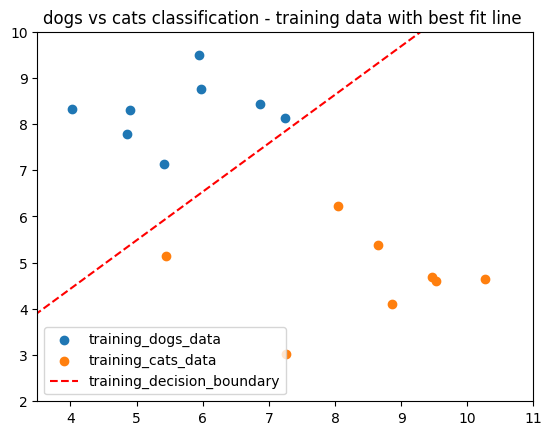

In [15]:
plt.scatter(X_train[y_train==0][:,0],X_train[y_train==0][:,1],label='training_dogs_data')
plt.scatter(X_train[y_train==1][:,0],X_train[y_train==1][:,1],label='training_cats_data')
plt.plot(x_vals_train,y_vals_train,color = 'red',linestyle = '--',label = 'training_decision_boundary')
#set same limits for x and y 
plt.xlim([3.5,11])
plt.ylim([2,10])

plt.title('dogs vs cats classification - training data with best fit line ')
plt.legend()
plt.show()

In [16]:
print(f'training_error:{train_error}')


training_error:0


In [17]:
test_error = compute_error(X_test[y_test==0],X_test[y_test==1],best_theta_train,best_theta0_train)
print(f"testing_error :{test_error}")

testing_error :0


In [18]:
print(f"x_test shape: {X_test.shape}")
print(X_test)

print(f"y_test shape: {y_test.shape}")
print(y_test)


x_test shape: (4, 2)
[[6.76405235 8.14404357]
 [7.81281615 6.20237985]
 [6.54563433 5.15634897]
 [5.40015721 9.45427351]]
y_test shape: (4,)
[0. 1. 1. 0.]


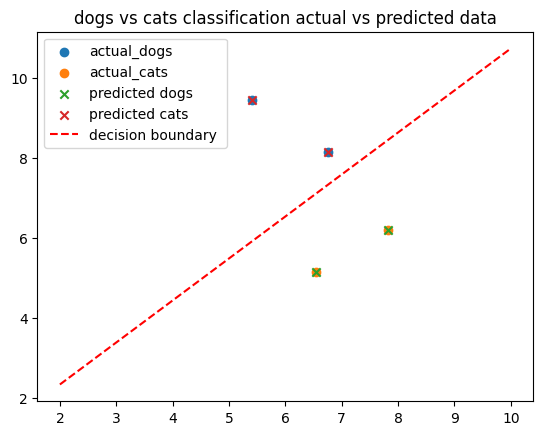

In [19]:
#plot actual test data and predicted test data 
plt.scatter (X_test[y_test==0][:,0],X_test[y_test==0][:,1],label='actual_dogs')
plt.scatter (X_test[y_test==1][:,0],X_test[y_test==1][:,1],label='actual_cats')

#predict test data points using the decision boundary 
predicted_labels = np.zeros_like(y_test)

for i , x_test in enumerate(X_test):
    if np.dot(best_theta_train,x_test)+best_theta0_train > 0:
        predicted_labels[i] = 1

#plot predicted test data 

plt.scatter(X_test[predicted_labels==0][:,0],X_test[predicted_labels==0][:,1],marker ='x',label = 'predicted dogs' )
plt.scatter(X_test[predicted_labels==1][:,0],X_test[predicted_labels==1][:,1],marker ='x',label = 'predicted cats' )



#plot decision boundary 
plt.plot(x_vals_train,y_vals_train,color ='red',linestyle = '--',label = 'decision boundary ')



plt.title('dogs vs cats classification actual vs predicted data')
plt.legend()
plt.show()